In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("used_device_data.csv")

df.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [2]:
df.shape

(3454, 15)

In [3]:
#checking for duplicate rows

duplicate =df[df.duplicated()]
duplicate.shape

(0, 15)

In [4]:
#checking for null values

df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [5]:
#treating null values by replacing them with median value

features = ["screen_size", "rear_camera_mp", "front_camera_mp", "internal_memory", "ram", "battery", "weight", "release_year", "days_used"]

for i in features:
    a = df[i].median()
    print(i, "median value : ", a)
    df[i] = df[i].fillna(a)

screen_size median value :  12.83
rear_camera_mp median value :  8.0
front_camera_mp median value :  5.0
internal_memory median value :  32.0
ram median value :  4.0
battery median value :  3000.0
weight median value :  160.0
release_year median value :  2015.5
days_used median value :  690.5


In [6]:
# check for null again

df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [7]:
#checking data types of features to classify them as numerical and categorical

df.dtypes

device_brand              object
os                        object
screen_size              float64
4g                        object
5g                        object
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

#to iterate through the feature


for feature in enumerate(df.columns):
    print(feature)

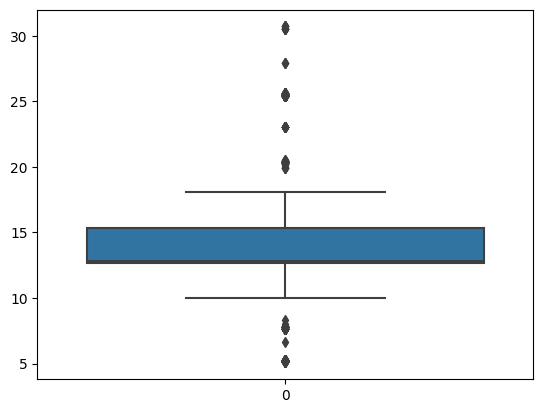

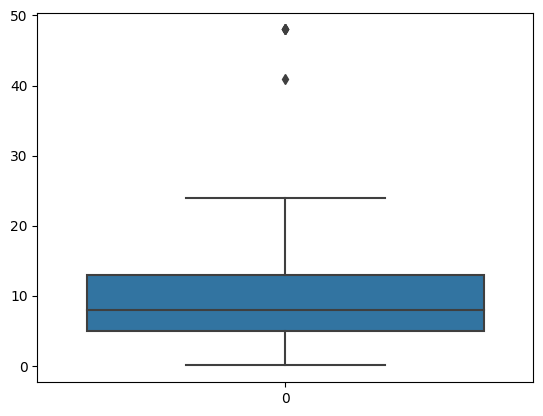

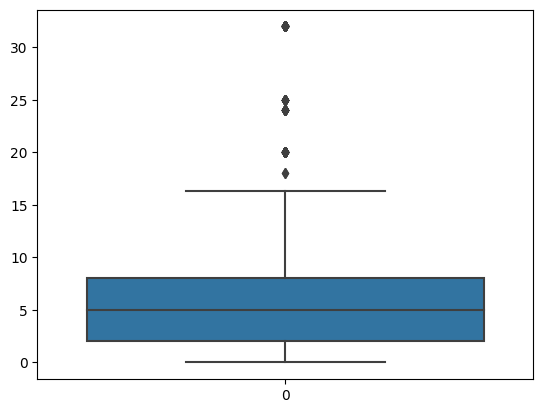

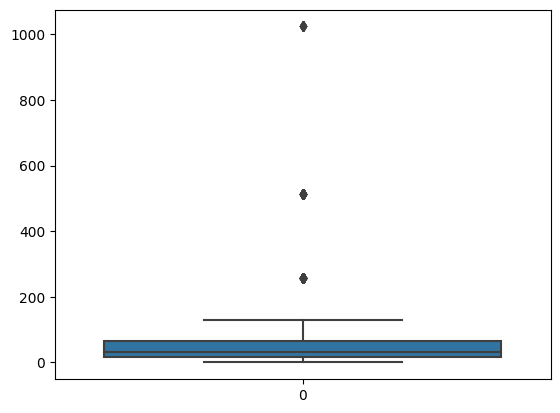

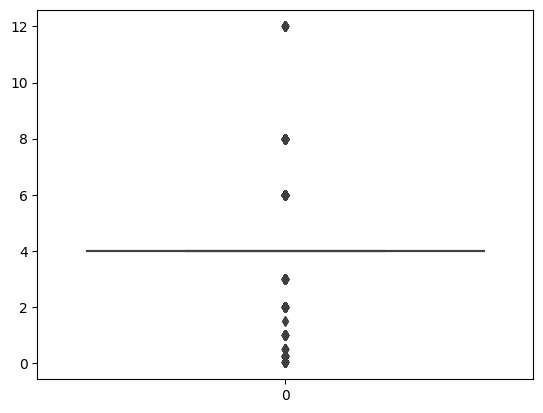

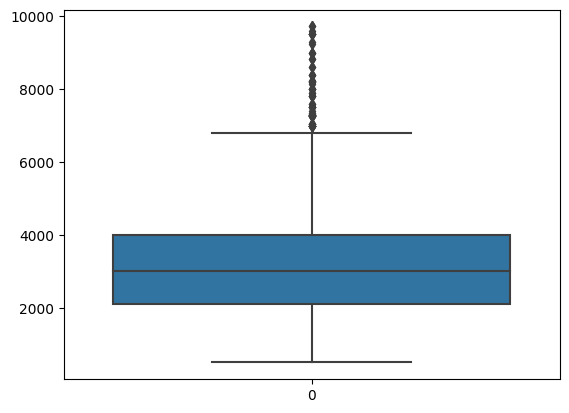

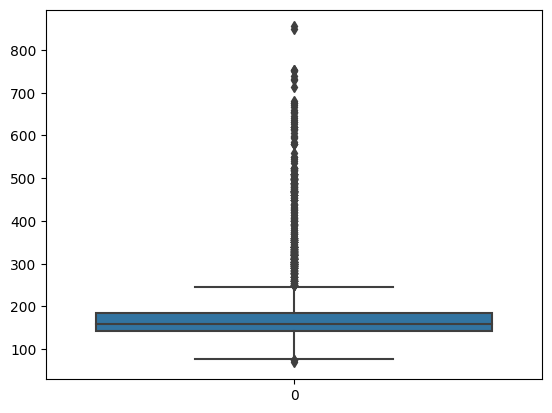

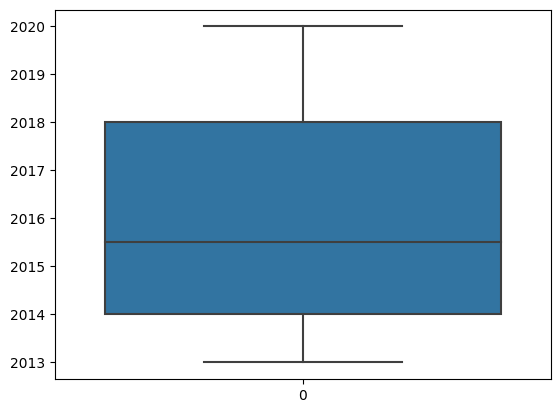

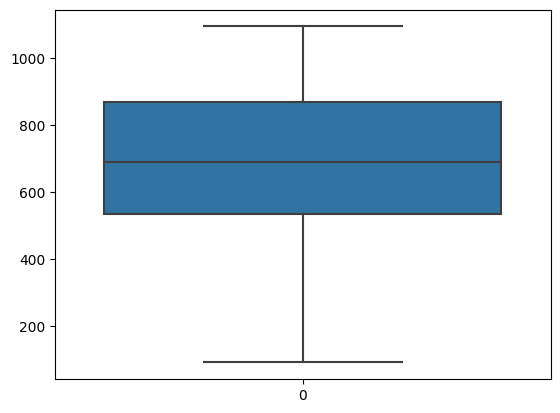

In [8]:
#checking for outliers in numerical features


for i in features:
    sns.boxplot(df[i])
    plt.show() 


release_year, days_used do not have outliers, other outliers will be treated

In [9]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lwr_bound = q1 - (1.5*iqr)
    upr_bound = q3 + (1.5*iqr)
    return lwr_bound, upr_bound

Low of screen_size is : 8.739999999999998
High of screen_size is : 19.3


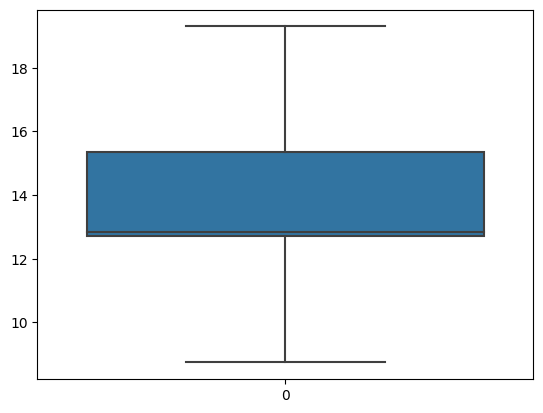

Low of rear_camera_mp is : -7.0
High of rear_camera_mp is : 25.0


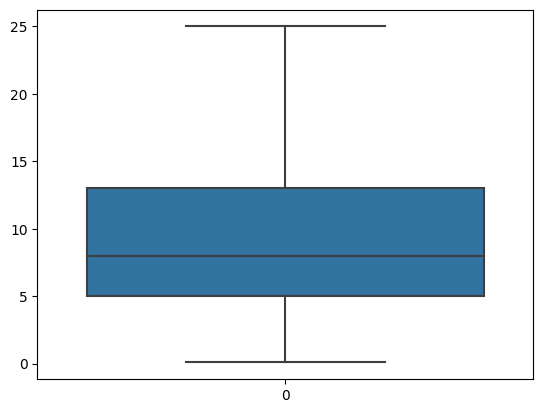

Low of front_camera_mp is : -7.0
High of front_camera_mp is : 17.0


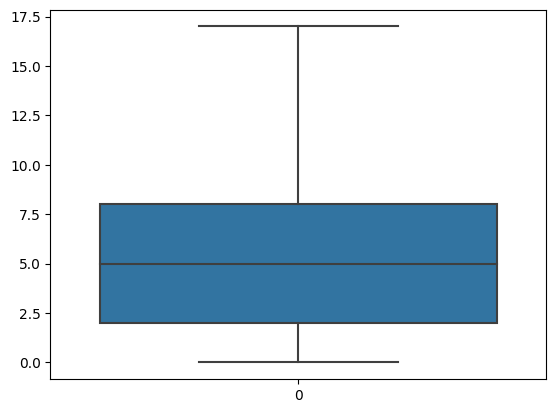

Low of internal_memory is : -56.0
High of internal_memory is : 136.0


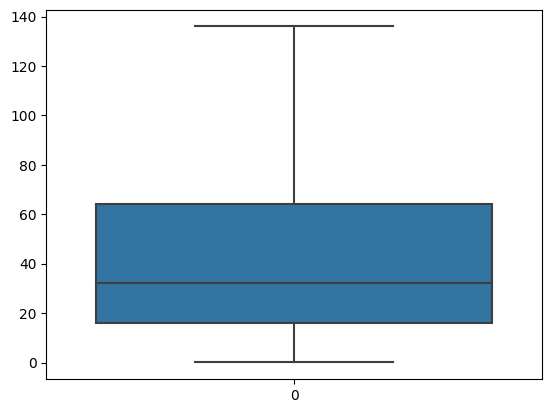

Low of ram is : 4.0
High of ram is : 4.0


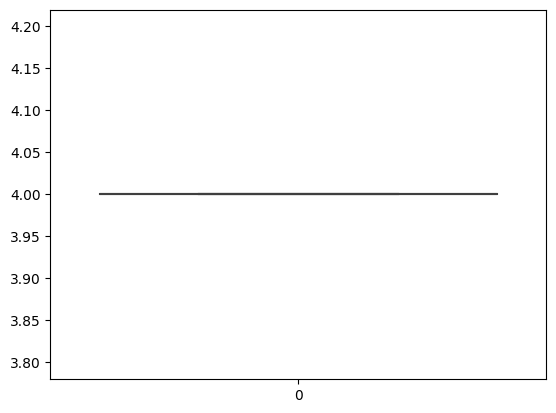

Low of battery is : -750.0
High of battery is : 6850.0


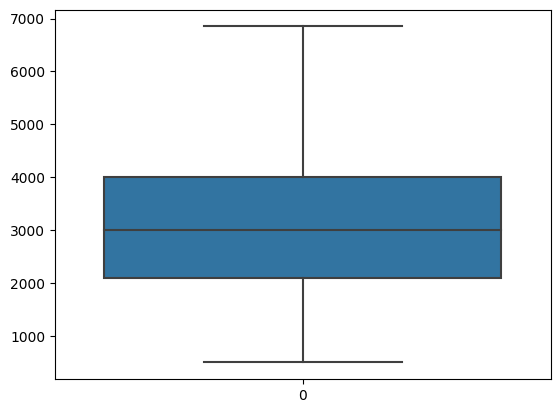

Low of weight is : 77.5
High of weight is : 249.5


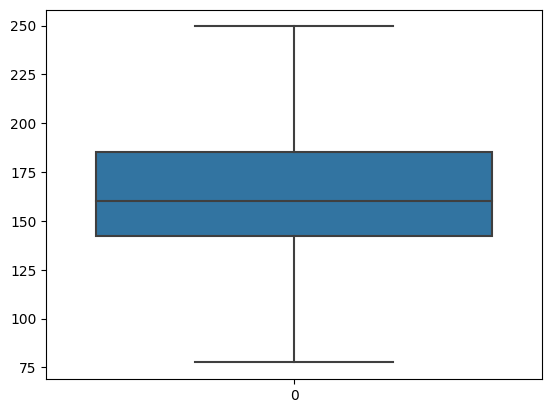

Low of release_year is : 2008.0
High of release_year is : 2024.0


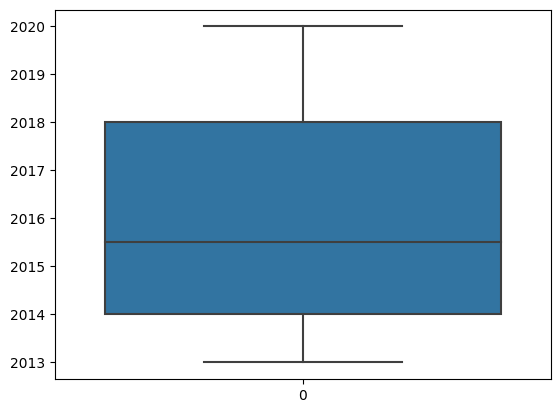

Low of days_used is : 30.625
High of days_used is : 1371.625


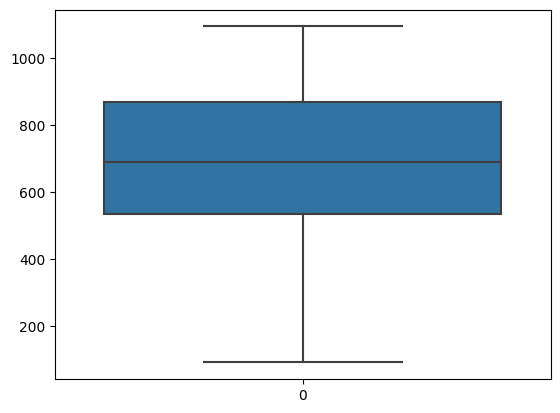

In [10]:
for i in features :
    low, high = remove_outlier(df[i])
    print("Low of", i, "is :", low)
    print("High of", i, "is :", high)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])
    sns.boxplot(df[i])
    plt.show()


In [11]:
#outliers are removed without changing the shape of dataset

df.shape

(3454, 15)

In [12]:
#label encoding categorical features,, can also use label encoder from sklearn

# X=df.drop("normalized_used_price", axis = 1)

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

    
df.dtypes

device_brand               int64
os                         int64
screen_size              float64
4g                         int64
5g                         int64
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year             float64
days_used                float64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

<AxesSubplot:>

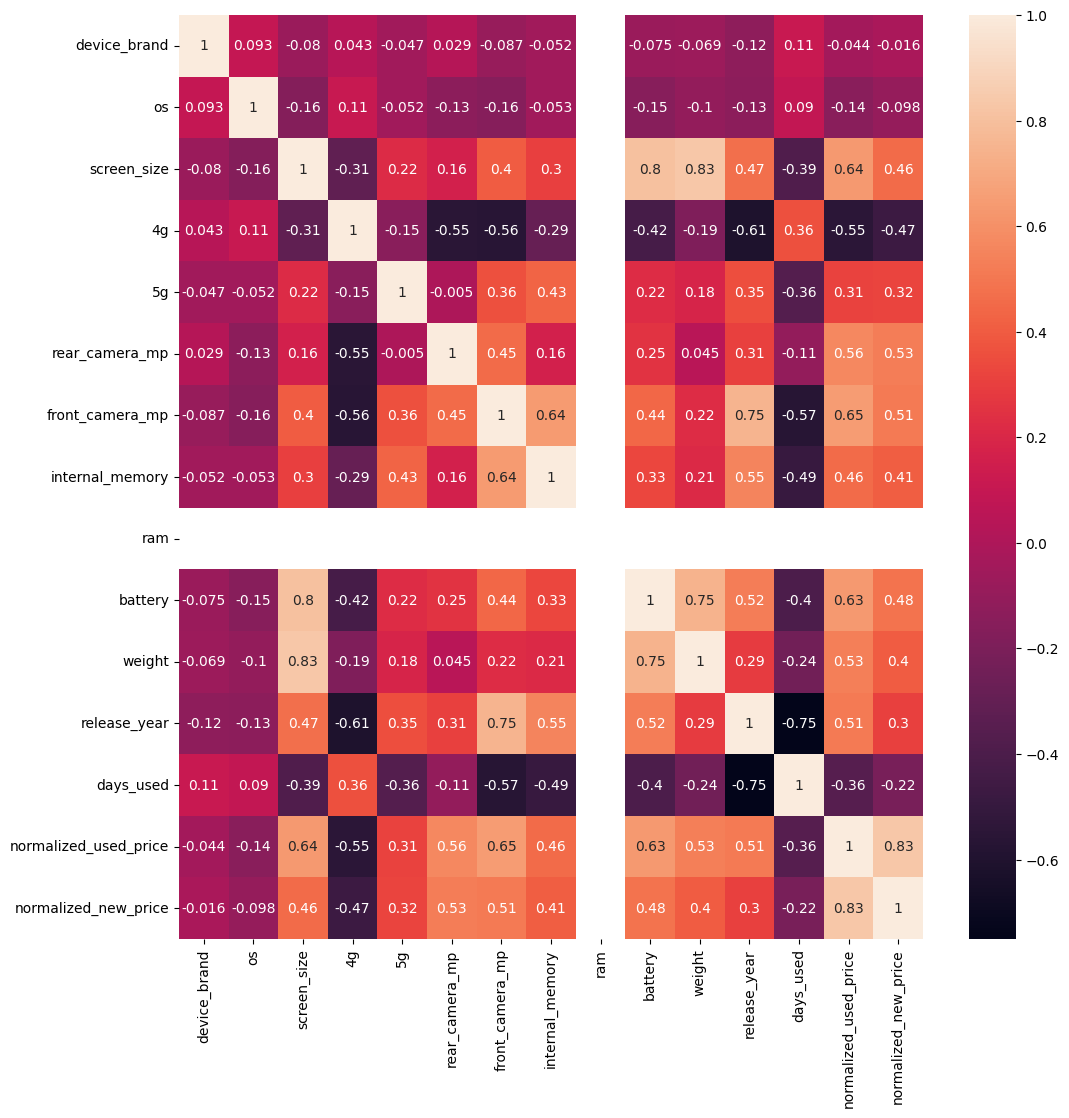

In [13]:
#compute the correlation matrix to select top 5 features for the model

corr = df.corr()
corr
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot = True)

normalized_used_price is depending on : normalized_new_price, screen_size battery, front_camera_mp,rear_camera_mp(corr>0.55)

In [14]:
df_req = df[["normalized_new_price", "screen_size", "battery", "front_camera_mp","rear_camera_mp"]]
df_req

,normalized_new_price,screen_size,battery,front_camera_mp,rear_camera_mp
0,4.715100,14.50,3020.0,5.0,13.0
1,5.519018,17.30,4300.0,16.0,13.0
2,5.884631,16.69,4200.0,8.0,13.0
3,5.630961,19.30,6850.0,8.0,13.0
4,4.947837,15.32,5000.0,8.0,13.0
...,...,...,...,...,...
3449,6.483872,15.34,5000.0,8.0,8.0
3450,6.251538,15.24,4000.0,8.0,13.0
3451,4.528829,15.80,4000.0,5.0,13.0
3452,4.624188,15.80,4000.0,5.0,13.0


In [15]:
# feature extraction using PCA

from sklearn.decomposition import PCA


pca = PCA()

pca.fit(df_req)

df_pca = pca.transform(df_req)
df_pca


array([[-8.96909153e+01,  1.69594186e+00,  3.28859721e+00,
         1.33157067e+00, -7.43316037e-01],
       [ 1.19033081e+03,  7.60597714e+00, -2.94504145e+00,
         1.20224949e+00, -4.64366020e-01],
       [ 1.09031450e+03,  1.59505590e+00,  2.02835646e+00,
         1.27499400e+00,  1.46020082e-01],
       ...,
       [ 8.90307414e+02, -4.00571867e-01,  3.80816108e+00,
         8.51033836e-01, -1.06527099e+00],
       [ 8.90307440e+02, -3.95258662e-01,  3.81037235e+00,
         8.56505276e-01, -9.70242953e-01],
       [ 8.90301823e+02, -4.42865111e-01,  4.04407258e+00,
        -2.11858673e+00, -1.14711448e+00]])

In [17]:
# splitting the dataset into train set, validation set and test set

from sklearn.model_selection import train_test_split

X = df_pca [:,: 5]
y = df.normalized_used_price

#splitting the original dataset into train and validation
X_train_f, X_val, y_train_f, y_val = train_test_split(X, y,test_size=0.2,random_state = 0)

# further split of training set into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_f, y_train_f, test_size=0.25,random_state = 0)

In [18]:
print('X Train Shape:',X_train.shape)
print('y Train Shape:',y_train.shape)
print('X Val Shape:', X_val.shape)
print('y Val Shape:', y_val.shape)
print('X Test Shape:',X_test.shape)
print('y Test Shape:',y_test.shape)

X Train Shape: (2072, 5)
y Train Shape: (2072,)
X Val Shape: (691, 5)
y Val Shape: (691,)
X Test Shape: (691, 5)
y Test Shape: (691,)


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [40]:
# evaluation of the model using validation set

y_pred=model.predict(X_val)


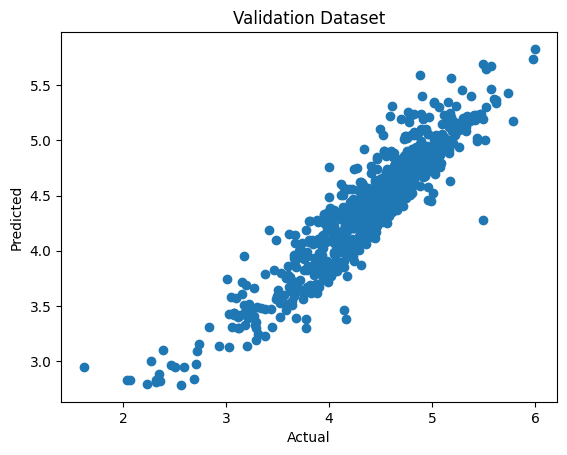

In [41]:
#validation set
plt.scatter(y_val,y_pred);
plt.title('Validation Dataset')
plt.xlabel('Actual');
plt.ylabel('Predicted');

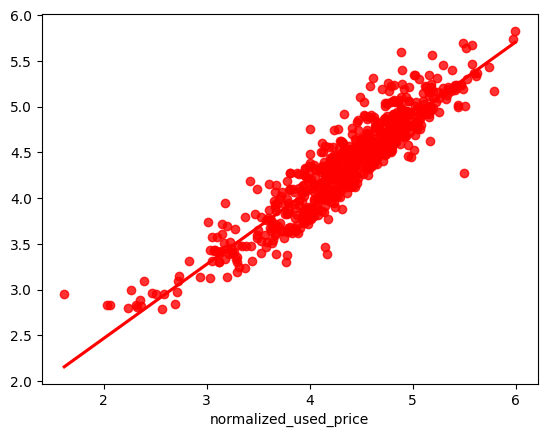

In [42]:
sns.regplot(x=y_val,y=y_pred,ci=None,color ='red');


In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

r2= r2_score(y_val,y_pred)
MSE= mean_squared_error(y_val,y_pred)

print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

R2:  0.85
MSE:  0.0619


In [47]:
# model on test set

y_pred = model.predict(X_test)

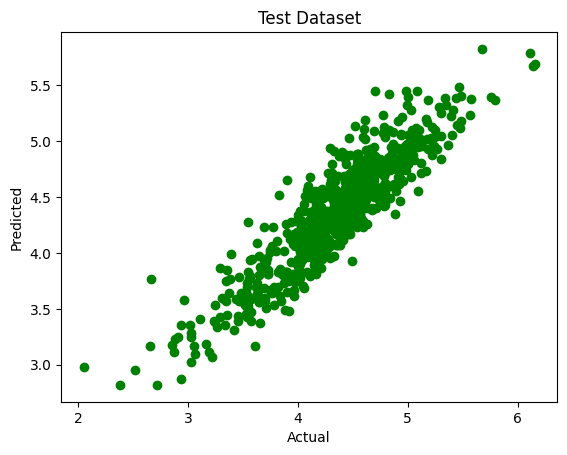

In [48]:
# test set
plt.scatter(y_test,y_pred, c='green');
plt.title('Test Dataset')
plt.xlabel('Actual');
plt.ylabel('Predicted');

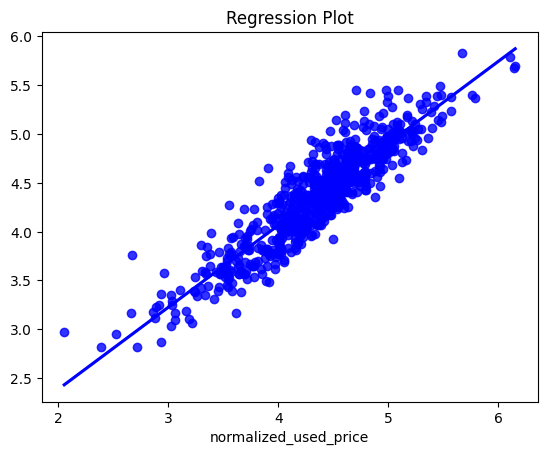

In [55]:
plt.title('Regression Plot')
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

In [53]:
r2= r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))
print("MAE: ",round(MAE,4))
print("RMSE: ",round(RMSE,4))

R2:  0.8232
MSE:  0.0557
MAE:  0.1858
RMSE:  0.236


In [54]:
pd.DataFrame([MAE,MSE,RMSE,r2],index=['MAE','MSE','RMSE','r2'],columns=['METRICES'])

,METRICES
MAE,0.185759
MSE,0.055677
RMSE,0.235960
r2,0.823191
